In [10]:
# !pip install hmmlearn
# !pip install yfinance
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt

def analyze_asset_with_hmm(ticker, start_date='2024-01-01', end_date='2025-09-01', n_states=3, save_plot=False):
    """
    Realiza uma análise de Cadeia Oculta de Markov (HMM) para um ativo financeiro.

    Args:
        ticker (str): O ticker do ativo (ex: 'NVDA', '^BVSP', 'BTC-USD').
        start_date (str): Data de início para o download dos dados.
        end_date (str): Data de término para o download dos dados.
        n_states (int): O número de estados ocultos a serem modelados.
        save_plot (bool): Se True, salva o gráfico como uma imagem PNG.
    """
    print(f"--- Iniciando a análise para {ticker} ---")

    # Passo 1: Download e Preparação dos Dados
    try:
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
        if data.empty:
            print(f"Erro: Não foi possível baixar dados para o ticker {ticker}. Verifique o ticker e o intervalo de datas.")
            return
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados: {e}")
        return

    # Calcular os retornos logarítmicos e formatar para o HMM
    log_returns = np.log(1 + data['Adj Close'].pct_change()).dropna()
    X = log_returns.values.reshape(-1, 1)

    if len(X) < 100:  # O hmmlearn precisa de uma quantidade razoável de dados
        print(f"Dados insuficientes para o ticker {ticker}. É necessário pelo menos 100 pontos de dados.")
        return

    print(f"Dados preparados para o modelo. Forma: {X.shape}")

    # Passo 2: Treinamento do Modelo HMM
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
    try:
        model.fit(X)
    except Exception as e:
        print(f"Erro no treinamento do modelo HMM para {ticker}: {e}")
        return

    # Passo 3: Inferência e Visualização
    hidden_states = model.predict(X)
    data = data.iloc[1:]
    data['Hidden_State'] = hidden_states

    # Visualização
    plt.figure(figsize=(15, 8))
    plt.plot(data['Adj Close'], label=f'Preço de Fechamento de {ticker}', color='gray', alpha=0.6)
    colors = ['red', 'green', 'blue', 'purple', 'orange']

    for i in range(n_states):
        state_data = data[data['Hidden_State'] == i]
        plt.scatter(state_data.index, state_data['Adj Close'], label=f'Estado Oculto {i}', s=10, color=colors[i % len(colors)])

    plt.title(f'Regimes de Mercado Ocultos - {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento Ajustado')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    if save_plot:
        plt.savefig(f'hmm_analysis_{ticker}.png')
        print(f"Gráfico salvo como hmm_analysis_{ticker}.png")

    plt.show()

    # Passo 4: Impressão dos Parâmetros do Modelo
    print(f"\n--- Parâmetros do Modelo HMM para {ticker} ---")
    print("Matriz de Probabilidades de Transição:\n", model.transmat_)
    print("Médias de Retornos por Estado:\n", model.means_)
    print("Variâncias de Retornos por Estado:\n", model.covars_)
    print("-------------------------------------------\n")

--- Iniciando a análise para ^BVSP ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (6356, 1)


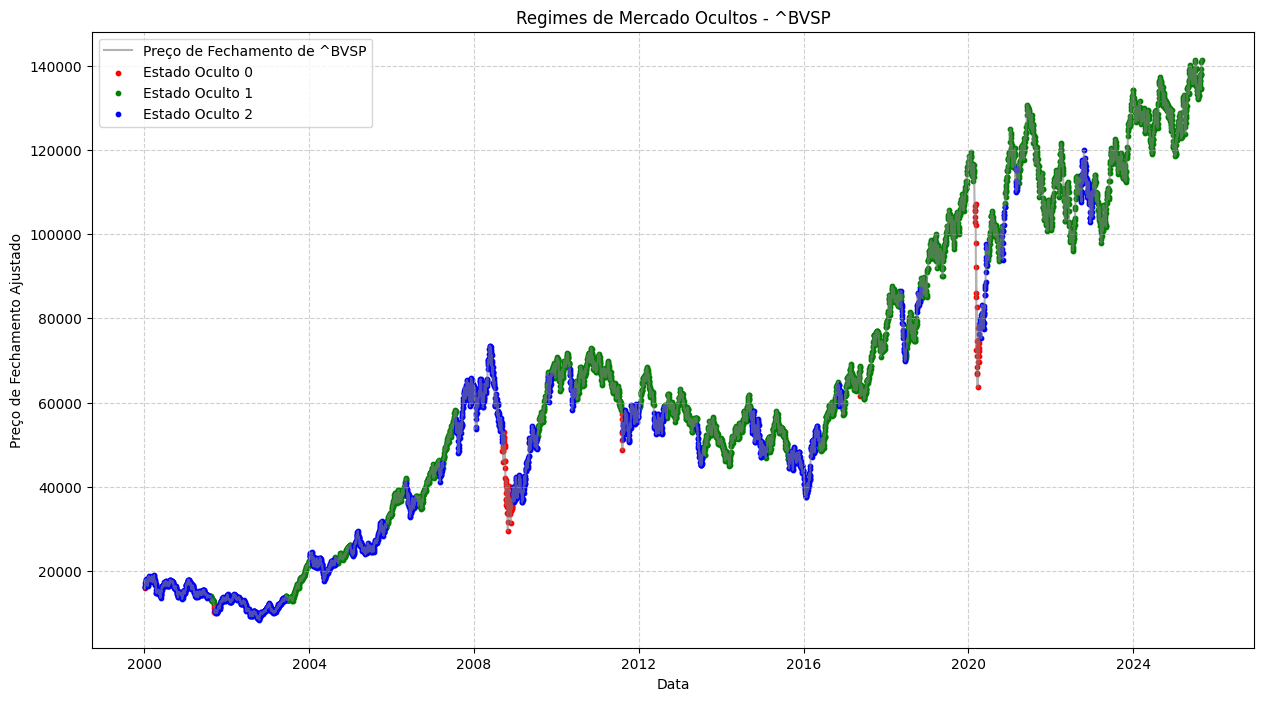


--- Parâmetros do Modelo HMM para ^BVSP ---
Matriz de Probabilidades de Transição:
 [[9.30991209e-01 6.16684296e-03 6.28419482e-02]
 [1.37651876e-03 9.91619216e-01 7.00426528e-03]
 [7.42318899e-04 1.30945806e-02 9.86163101e-01]]
Médias de Retornos por Estado:
 [[-1.04433864e-02]
 [ 8.96550979e-04]
 [-2.52047061e-05]]
Variâncias de Retornos por Estado:
 [[[0.00333445]]

 [[0.00013408]]

 [[0.00040026]]]
-------------------------------------------



In [12]:
# Analisar IBOVESPA
analyze_asset_with_hmm('^BVSP', start_date='2000-01-01', end_date='2025-09-01', n_states=3)

--- Iniciando a análise para GC=F ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (6272, 1)


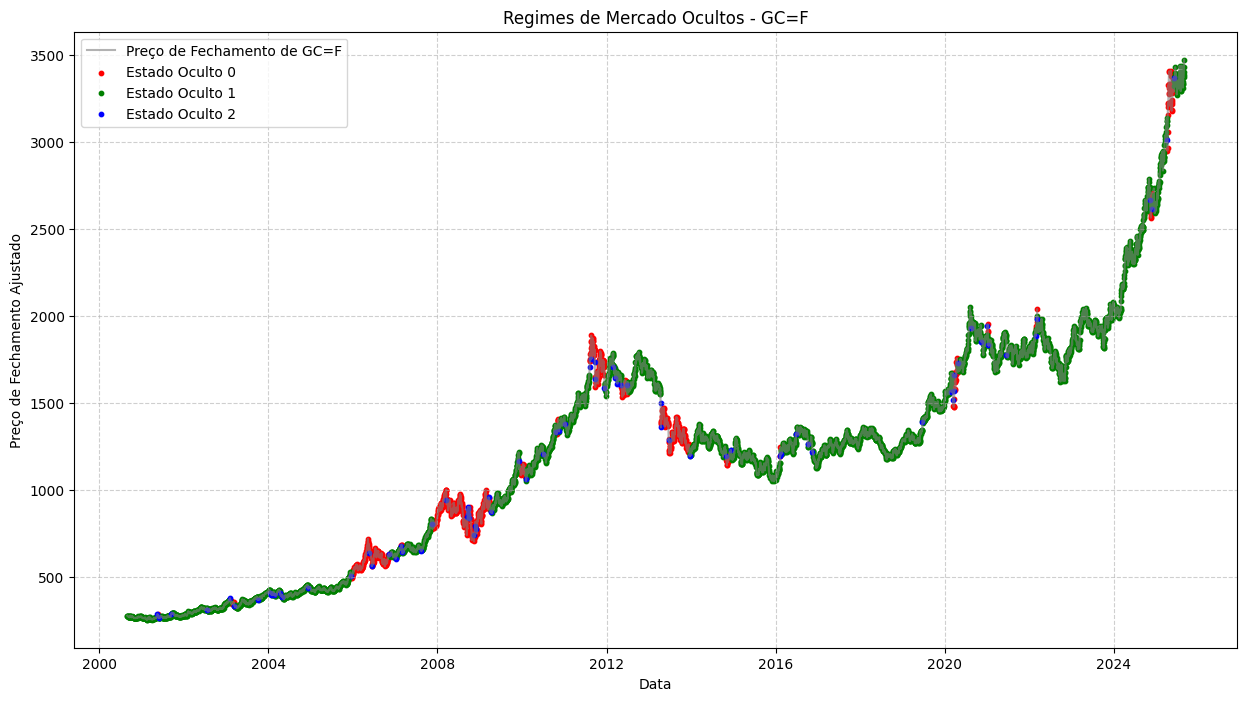


--- Parâmetros do Modelo HMM para GC=F ---
Matriz de Probabilidades de Transição:
 [[9.24945676e-01 3.83157613e-03 7.12227478e-02]
 [2.16120895e-04 9.85731657e-01 1.40522220e-02]
 [4.74837316e-01 3.77106795e-01 1.48055889e-01]]
Médias de Retornos por Estado:
 [[ 0.00033285]
 [ 0.00064206]
 [-0.00580836]]
Variâncias de Retornos por Estado:
 [[[2.27199989e-04]]

 [[6.91943995e-05]]

 [[9.57435211e-04]]]
-------------------------------------------



In [13]:
# Analisar Ouro
analyze_asset_with_hmm('GC=F', start_date='2000-01-01', end_date='2025-09-01', n_states=3)

--- Iniciando a análise para BTC-USD ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (2069, 1)


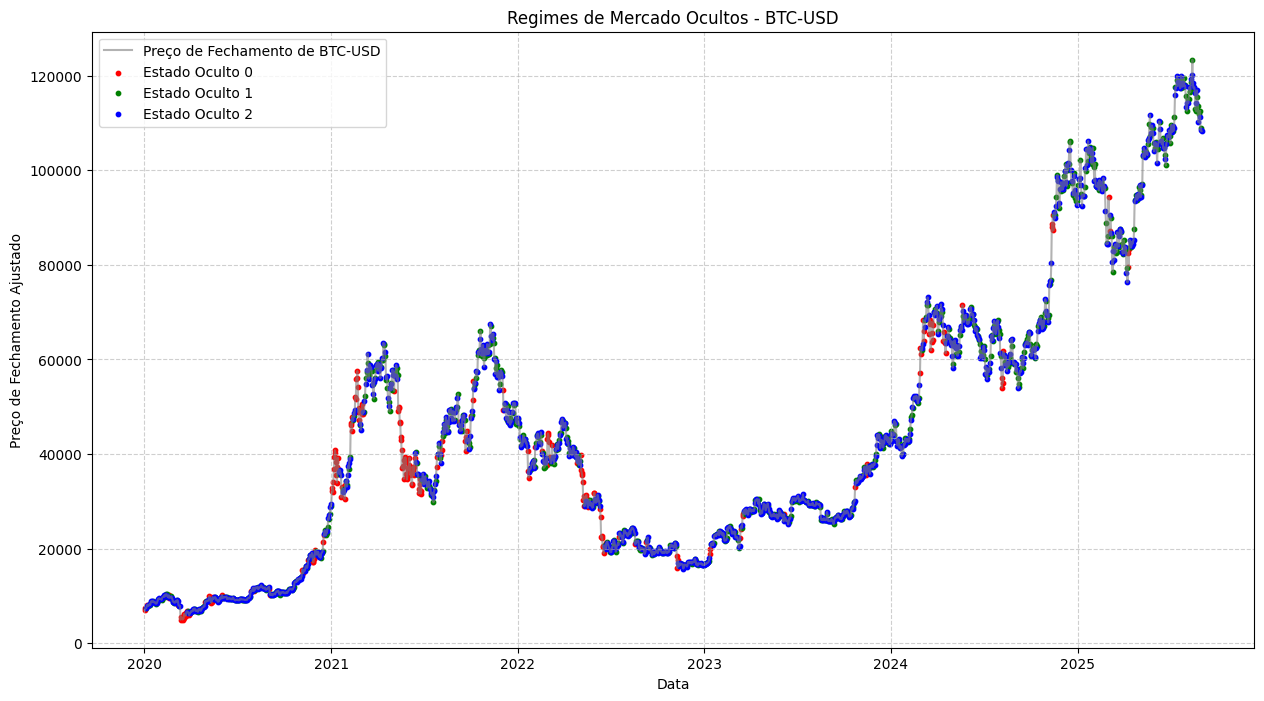


--- Parâmetros do Modelo HMM para BTC-USD ---
Matriz de Probabilidades de Transição:
 [[0.62708636 0.045523   0.32739064]
 [0.05496392 0.12900148 0.81603461]
 [0.09339566 0.83425529 0.07234906]]
Médias de Retornos por Estado:
 [[ 8.27790593e-04]
 [-6.69641083e-05]
 [ 2.84791481e-03]]
Variâncias de Retornos por Estado:
 [[[0.00399232]]

 [[0.00023217]]

 [[0.00079415]]]
-------------------------------------------



In [14]:
# Analisar Bitcoin
analyze_asset_with_hmm('BTC-USD', start_date='2020-01-01', end_date='2025-09-01', n_states=3)

--- Iniciando a análise para NVDA ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (1422, 1)


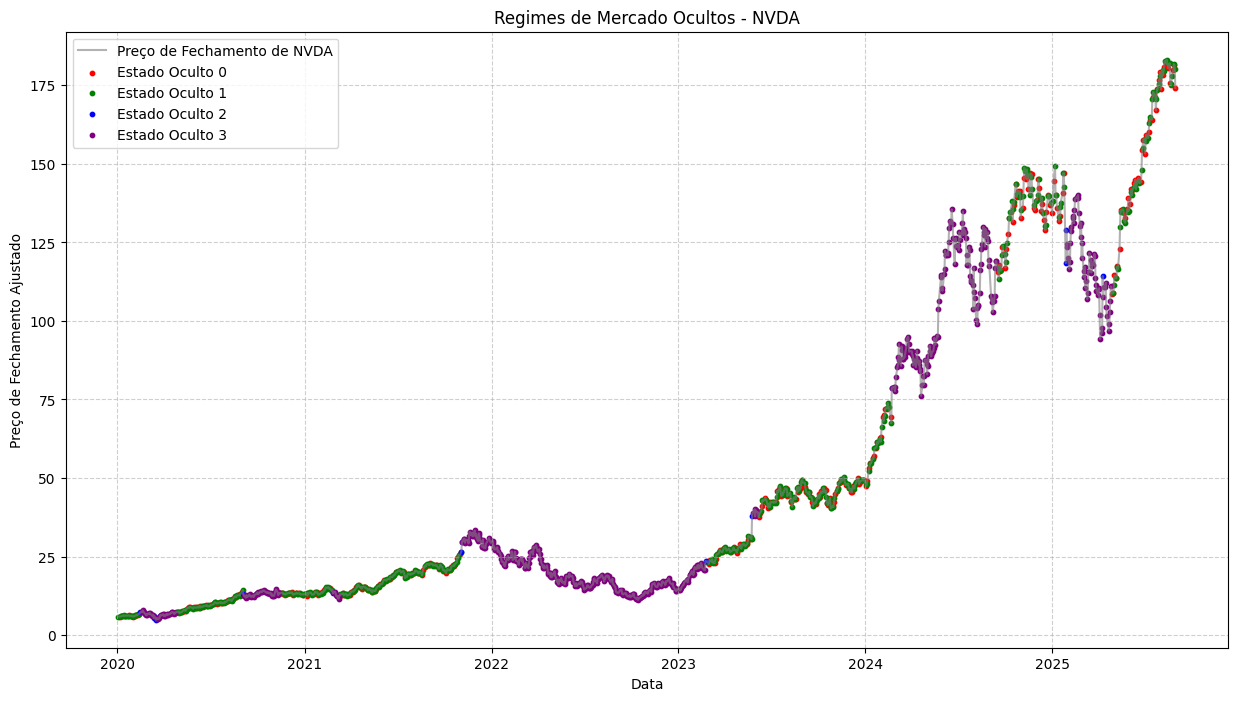


--- Parâmetros do Modelo HMM para NVDA ---
Matriz de Probabilidades de Transição:
 [[1.24207370e-03 9.97405894e-01 2.20092542e-04 1.13194012e-03]
 [9.24925205e-01 4.77386686e-02 2.47991670e-02 2.53695957e-03]
 [3.42882071e-03 3.95433003e-02 3.72906565e-01 5.84121314e-01]
 [1.77619824e-02 3.00586727e-04 1.83182358e-02 9.63619195e-01]]
Médias de Retornos por Estado:
 [[ 0.00149329]
 [ 0.00625971]
 [ 0.01717132]
 [-0.00068251]]
Variâncias de Retornos por Estado:
 [[[0.000593  ]]

 [[0.000443  ]]

 [[0.01026033]]

 [[0.00154131]]]
-------------------------------------------



In [15]:
# (NVIDIA) e um número diferente de estados
analyze_asset_with_hmm('NVDA', start_date='2020-01-01', end_date='2025-09-01', n_states=4)